# Smart Beta Trading Strategies & Asset Pricing Models 
<p>Trading strategies that generate excess performance after adjusting for market risk have proliferated in recent years under the name “Smart Beta”. An investor considering such a strategy must evaluate whether the new method represents a repackaging of strategies or stylistic biases already in their portfolio, a new risky strategy for which they are being compensated, or genuine outperformance. </p>

<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>


In [25]:
# Libraries we use 
suppressPackageStartupMessages(library(jrvFinance))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(optimx))
suppressPackageStartupMessages(library(nloptr))
suppressPackageStartupMessages(library(quantmod))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggthemes))

In [26]:
df = read.csv("/Users/robertgitari/Desktop/Fuqua\ Academics/Term3/Intermediate\ Finance/Cases/2/excess_return.csv")
strategy <- c(names(df[,c(1:5)]))
head(df,3)
strategy # Excess returns from each strategies and risk factors returns

## Data cleaning. No nulls/NA's 
sum(is.na(df))
colSums(is.na(df))

Market.cap.weighted,Equal.weighted,Inverse.Vol,MVP.weighted,FundamentalComposite,Mkt.RF,SMB,HML,MOM,RF
-0.0125,-0.01324856,-0.006409274,0.004858860,-0.009260994,-0.0125,-0.0079,0.0169,-0.0015,0.0053
-0.0584,-0.07861493,-0.061691488,-0.035497935,-0.050064176,-0.0584,-0.0388,0.0092,-0.0249,0.0046
0.0264,0.01620171,0.009716881,-0.008513143,0.027363012,0.0264,-0.0026,-0.0045,0.0395,0.0046


[1] "Market.cap.weighted"  "Equal.weighted"       "Inverse.Vol"         
[4] "MVP.weighted"         "FundamentalComposite"

[1] 0

Market.cap.weighted       Equal.weighted          Inverse.Vol 
                   0                    0                    0 
        MVP.weighted FundamentalComposite               Mkt.RF 
                   0                    0                    0 
                 SMB                  HML                  MOM 
                   0                    0                    0 
                  RF 
                   0

In [27]:
## Transforming the data to make it easier to use 
means = apply(df[,strategy], 2, mean, na.rm = TRUE)
sds = apply(df[,strategy], 2, sd, na.rm = TRUE)

sharpe <- function(mean,sd) {
  sp = mean*12/ (sd* sqrt(12))
}
sharpes = sharpe(means,sds)

sharpes = as.data.frame(sharpes)
sharpes <- cbind(strategies = rownames(sharpes), sharpes)
rownames(sharpes) <- 1:nrow(sharpes)
sharpes

strategies,sharpes
Market.cap.weighted,0.2997447
Equal.weighted,0.3845014
Inverse.Vol,0.4516968
MVP.weighted,0.4931280
FundamentalComposite,0.4114823


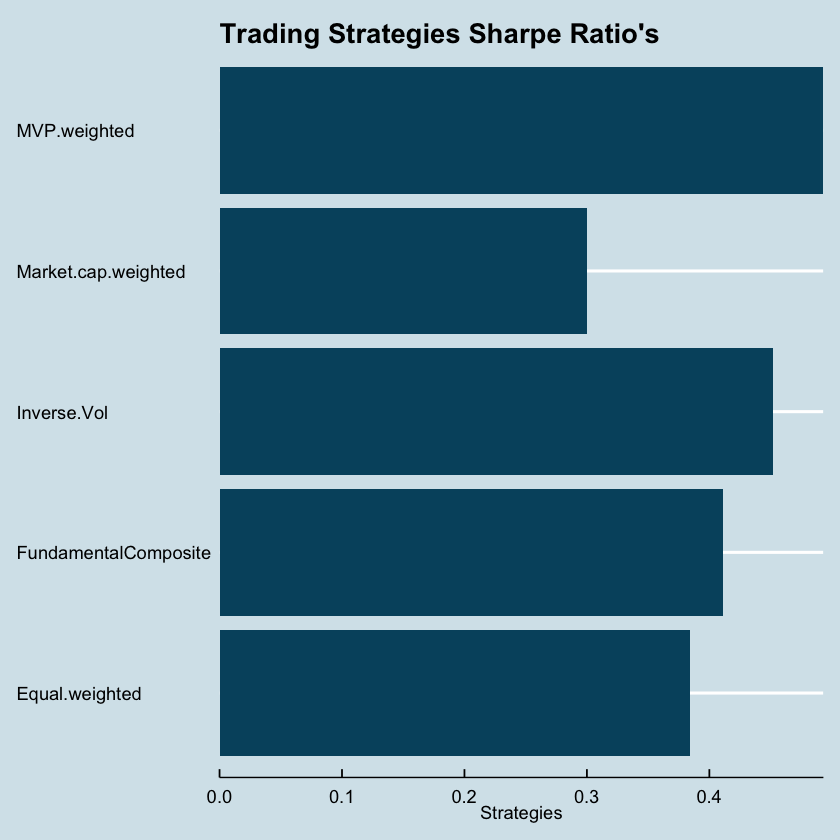

In [28]:
p <- ggplot(data=sharpes, aes(x=strategies, y=sharpes)) +
   geom_bar(stat="identity",fill="#00526D") + labs(title= "Trading Strategies Sharpe Ratio's", y= "Strategies") 
p + coord_flip() + theme_economist() + scale_y_continuous(expand = c(0,0))  + theme(axis.title.y=element_blank())

# CAPM: The One Factor Model

In [29]:
## CAPM: One factor Models 
strats = df[,strategy]
mkt = df$Mkt.RF
my_lms <- lapply(1:length(strategy), function(x) lm(strats[,x] ~mkt ))
sapply(my_lms, coef) # coefficients 
summaries <- lapply(my_lms, summary)
coeffs = lapply(summaries, function(x) x$coefficients[, c(1,4)])
rquared = sapply(summaries, function(x) c(r_sq = x$r.squared, 
                                adj_r_sq = x$adj.r.squared))
names(coeffs) = strategy
colnames(rquared) = strategy
coeffs

#Perfect fit because the market cap weighted is the market portfolio so we are regressing it on itself 
# We can do this with for loops but I prefer writing functions and using lappy and sapply 
# as when files are bigger functional programming (like by using these functions) becomes more useful 

(Intercept),1.832807e-18,0.001386203,0.002106599,0.002752161,0.001607559
mkt,1.000000e+00,1.017863654,0.834084244,0.467963004,0.897891979


Warning message in summary.lm(X[[i]], ...):
“essentially perfect fit: summary may be unreliable”

,Estimate,Pr(>|t|)
(Intercept),1.832807e-18,0.01423337
mkt,1.000000e+00,0.00000000
,Estimate,Pr(>|t|)
(Intercept),0.001386203,2.393562e-02
mkt,1.017863654,1.296377e-287
,Estimate,Pr(>|t|)
(Intercept),0.002106599,2.380071e-03
mkt,0.834084244,7.122030e-224
,Estimate,Pr(>|t|)
(Intercept),0.002752161,1.043022e-02


## Intepreting results 
<p>Alpha Interpretation: alpha represents abnormal returns. If the regression model fully explains the stock returns, alpha should be zero. Alpha is statistically insignificant and, thus, indistinguishable from zero if t-stat is higher than 1.96. From the results, we can infer that equal weighted, inverse volatility and minimum variance investment strategies can be fully explained by fluctuations market and other factors (No alpha). <p>
    
<p>Beta Interpretation: Beta measures the sensitivity of portfolio return to the factors. One additional unit of exposure to the factor would change the portfolio return by β percent. <p>

In [30]:
rquared

,Market.cap.weighted,Equal.weighted,Inverse.Vol,MVP.weighted,FundamentalComposite
r_sq,1,0.9225010,0.8628314,0.4512411,0.9073781
adj_r_sq,1,0.9223503,0.8625645,0.4501734,0.9071979


## Intepreting results 

<p> R-squared: R-squared measures the proportion of variance of returns that is explained by the factors of the model. The higher the  R-squared the more the one factor model explains of the stock returns.<p>
    
The alpha's are all statistically significant and positive for all strategies. Which suggests  deviation from one factor model, and that their is in fact value addition by using these investment strategies rather than the one factor model.<p>

# Multifactor models 
Carhart four-factor model
*** More here

In [31]:
### factor models 
smb = df$SMB  
hml = df$HML
mom = df$MOM 
multi <- lapply(1:length(strategy), function(x) lm(strats[,x] ~mkt + smb + hml + mom ))

summariesmulti <- lapply(multi, summary)
coeffsmulti = lapply(summariesmulti, function(x) x$coefficients[, c(1,4)])
rquaredmulti = sapply(summariesmulti, function(x) c(r_sq = x$r.squared, 
                                          adj_r_sq = x$adj.r.squared))

names(coeffsmulti) = strategy
colnames(rquaredmulti) = strategy
coeffsmulti

Warning message in summary.lm(X[[i]], ...):
“essentially perfect fit: summary may be unreliable”

,Estimate,Pr(>|t|)
(Intercept),1.832807e-18,0.01785741
mkt,1.000000e+00,0.00000000
smb,-2.925071e-17,0.23725310
hml,-2.486794e-17,0.35378808
mom,-1.724508e-17,0.31465136
,Estimate,Pr(>|t|)
(Intercept),0.0003682346,3.763556e-01
mkt,1.0089421051,0.000000e+00
smb,0.2693232523,3.690592e-67
hml,0.2525463705,5.611962e-54


## Intepreting results 
</p> Market cap weighted & Fundamental Composite strategies are now the only strategies that show statistically significant alphas (even though the market cap weighted is very small and negative, while the fundamental composite is positive but very small). 

P values less than 0.05 are statistically significant at 5% Level (0.01785741,0.04535934) and using t values if greater than 1.96.</p>

In [32]:
tmulti = lapply(summariesmulti, function(x) x$coefficients[,3])
tmulti

[[1]]
  (Intercept)           mkt           smb           hml           mom 
 2.376245e+00  5.696456e+16 -1.183268e+00 -9.281112e-01 -1.006500e+00 

[[2]]
(Intercept)         mkt         smb         hml         mom 
  0.8854032 106.5891262  20.2051701  17.4800698  -4.4501448 

[[3]]
(Intercept)         mkt         smb         hml         mom 
  0.9706233  76.2392097   5.0904051  20.9737743  -1.8782051 

[[4]]
(Intercept)         mkt         smb         hml         mom 
  0.7113654  26.5637388  -1.3203462  13.5522231   0.4776847 

[[5]]
(Intercept)         mkt         smb         hml         mom 
   2.006219  139.646550   -9.541188   32.048538  -10.156779

In [33]:
rquaredmulti

,Market.cap.weighted,Equal.weighted,Inverse.Vol,MVP.weighted,FundamentalComposite
r_sq,1,0.9667758,0.9294436,0.6066441,0.9769742
adj_r_sq,1,0.9665158,0.9288913,0.6035649,0.9767939


## Conclusion/Summary
</p> According to our results, all strategies apart from market cap and fundamental composite strategies ’s alpha are all statistically insignificant and, thus, does not have an abnormal returns relative to known factors. This insignificance of alpha means that the return from these other strategies can be replicated by a combination of four factors and the strategy itself is not adding any extra value

Four of these strategies (all except MVP weighted) have R squared's higher than 90% which  indicates that more than 90% of the common variance of the new strategy portfolio returns can be explained by the 4 factors..</p>